In [32]:
# PCA (주성분 분석)
# 비지도 학습

In [33]:
# 불필요한 경고 출력 방지
import warnings
warnings.filterwarnings("ignore")

In [34]:
# 데이터 로딩

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()

data = iris.data
feature_names = iris.feature_names

target = iris.target
target_names = iris.target_names

In [36]:
import pandas as pd

iris_df = pd.DataFrame(
    data= data,
    columns = feature_names
)

iris_df['target'] = target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [37]:
# 시각화

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# 꽃잎과 꽃받침을 따로 시각화

In [40]:
sepal_columns = [feature_names[0], feature_names[1]]
petal_columns = [feature_names[2], feature_names[3]]

sepal_columns, petal_columns

(['sepal length (cm)', 'sepal width (cm)'],
 ['petal length (cm)', 'petal width (cm)'])

In [41]:
# 꽃받침 시각화

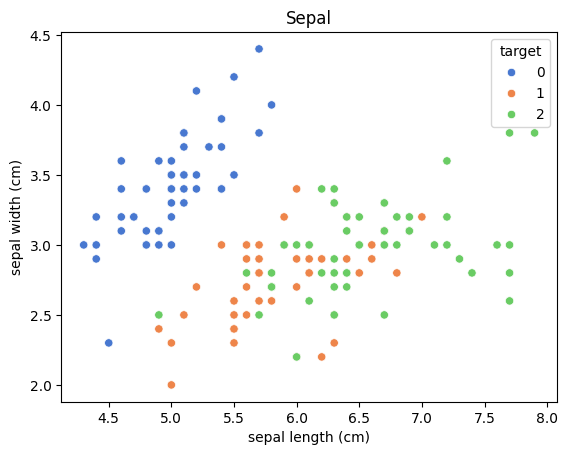

In [42]:
sns.scatterplot(
    x = sepal_columns[0],
    y = sepal_columns[1],
    hue = 'target',
    palette = 'muted',
    data= iris_df
)

plt.title("Sepal")

plt.show()

In [43]:
# 꽃잎 시각화

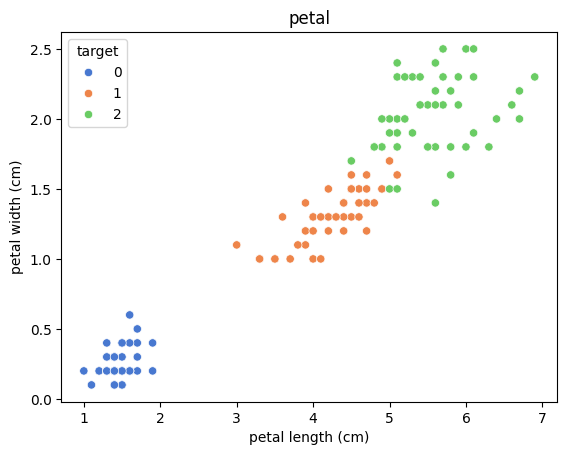

In [44]:
sns.scatterplot(
    x = petal_columns[0],
    y = petal_columns[1],
    hue = 'target', # 타겟별로 색을 따로
    palette = 'muted', # 색 테마
    data= iris_df
)

plt.title("petal")
plt.show()

In [45]:
# PCA 차원 변환

In [46]:
# 4차원데이터를 2차원으로 축소

In [47]:
from sklearn.decomposition import PCA

# n_components = 축소할 차원(주성분 갯수)-> 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(iris_df.drop("target", axis=1)) # PCA에서의 fit은 입력한 데이터 매트릭스의 공분산 행렬(A^TA), 고윳값 분해까지 진행 -> 분산이 가장 큰 두개의 주성분을 구한다.

# 데이터 변환을 수행
iris_pca = pca_2.transform(iris_df.drop("target", axis=1))# 4차원에서 2차원으로 변환

iris_pca.shape


(150, 2)

In [48]:
# PCA로 변환된 데이터를 dataframe으로 만들기

pca_columns = ["Component 1", "Component 2"]

iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_columns
)

iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


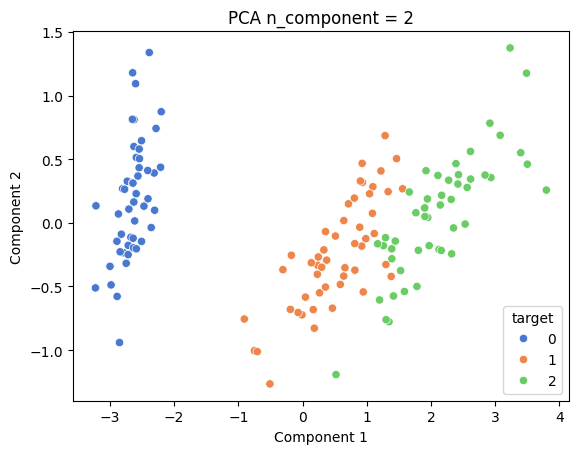

In [49]:
sns.scatterplot(
    x="Component 1",
    y="Component 2",
    hue='target',
    palette='muted',
    data=iris_pca_df
)

plt.title("PCA n_component = 2")
plt.show()

In [50]:
# 4차원에서 3차원으로 축소

pca_3 = PCA(n_components=3)

iris_pca_3 = pca_3.fit_transform(iris_df.drop("target", axis = 1))
iris_pca_3.shape

(150, 3)

In [51]:
# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ["Component 1", "Component 2", "Component 3"]
iris_pca_df = pd.DataFrame(
    iris_pca_3,
    columns=pca_columns
)
iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,Component 3,target
0,-2.684126,0.319397,-0.027915,0
1,-2.714142,-0.177001,-0.210464,0
2,-2.888991,-0.144949,0.017900,0
3,-2.745343,-0.318299,0.031559,0
4,-2.728717,0.326755,0.090079,0


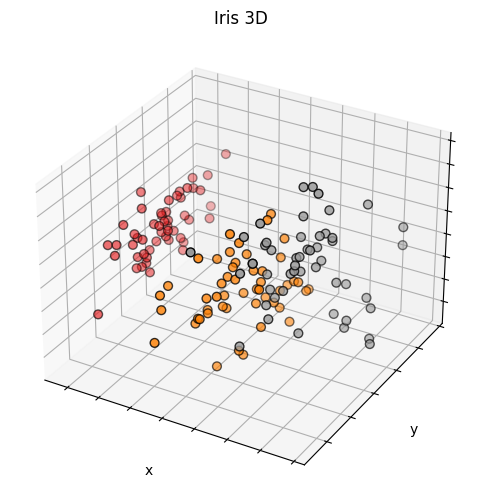

In [52]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

ax.scatter(iris_pca_df["Component 1"], # x축 데이터
           iris_pca_df["Component 2"], # y축 데이터
           iris_pca_df["Component 3"], # z축 데이터
           c=iris_pca_df['target'], # 3d scatter의 색깔 기준
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Iris 3D")
ax.set_xlabel("x")
ax.w_xaxis.set_ticklabels([]) # x축 tick 사용하지 않기
ax.set_ylabel("y")
ax.w_yaxis.set_ticklabels([]) # y축 tick 사용하지 않기
ax.set_zlabel("z")
ax.w_zaxis.set_ticklabels([]) # z축 tick 사용하지 않기

plt.show()

In [53]:
#PCA를 수행한 후 지도학습 모델 만들기

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

lr_clf = LogisticRegression()

scores = cross_val_score(
    lr_clf,
    iris.data,
    iris.target,
    scoring='accuracy',
    cv=3
)

print("원본 정확도 : {:.3f}".format(np.mean(scores)))

원본 정확도 : 0.973


In [55]:
# PCA 적용. 4차원 -> 2차원
from sklearn.decomposition import PCA

# n_components : 축소할 차원. 주성분 개수. 분산이 가장 큰 벡터의 개수
pca_2 = PCA(n_components=2)

# PCA 객체에 데이터 입력
pca_2.fit(iris_df.drop("target", axis=1))

# 데이터 변환 수행
iris_pca = pca_2.transform(iris_df.drop("target", axis=1))

# PCA로 변환된 데이터를 DataFrame으로 만들기
pca_columns = ["Component 1", "Component 2"]
iris_pca_df = pd.DataFrame(
    iris_pca,
    columns=pca_columns
)
iris_pca_df['target'] = target
iris_pca_df.head()

,Component 1,Component 2,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [56]:
lr_reg = LogisticRegression()

pca_X= iris_pca_df[['Component 1', 'Component 2']]

scores_pca = cross_val_score(
    lr_reg,
    pca_X,
    iris_pca_df["target"],
    scoring='accuracy',
    cv=3
)

print("pca 변환 후 평균 정확도 : {:.3f}".format(np.mean(scores_pca)))

# 데이터를 반만 사용하고도 좋은 정확도 = 가성비가 좋다

pca 변환 후 평균 정확도 : 0.960


In [57]:
# LDA

In [58]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2) # 클래스를 잘 판별할 수 있는 축을 두개 생성

In [59]:
# LDA 는 클래스의 정보를 값이 입력하는 형태로 데이터를 입력
lda.fit(iris.data, iris.target) # X, y 를 함께 입력해야 한다.


LinearDiscriminantAnalysis(n_components=2)

In [61]:
iris_lda = lda.transform(iris.data)
iris_lda.shape

(150, 2)

In [62]:
# 시각화

In [64]:
iris_lda_df = pd.DataFrame(
    data=iris_lda,
    columns=['c1','c2']
)

iris_lda_df['target'] = iris.target
iris_lda_df.head()

,c1,c2,target
0,8.061800,-0.300421,0
1,7.128688,0.786660,0
2,7.489828,0.265384,0
3,6.813201,0.670631,0
4,8.132309,-0.514463,0


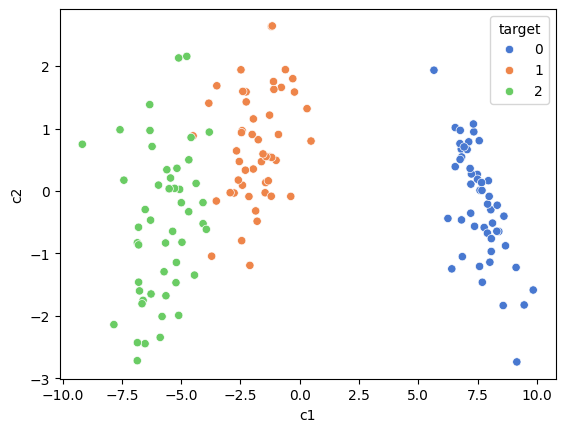

In [66]:
sns.scatterplot(
    x='c1',
    y='c2',
    hue='target',
    palette='muted',
    data=iris_lda_df
)

plt.show()

In [67]:
# SVD

In [68]:
from sklearn.decomposition import TruncatedSVD

t_svd = TruncatedSVD(n_components=2) # 특잇값 상위 2개만 사용하겠다.(특이 벡터)
iris_svd = t_svd.fit_transform(iris.data) # iris_svd = 원래의 iris 데이터를 최대한 잘 표현할 수 있는 2개
iris_svd.shape

(150, 2)

In [69]:
iris_svd_df = pd.DataFrame(
    data=iris_svd,
    columns=['c1','c2']
)

iris_svd_df['target'] = iris.target
iris_svd_df.head()

,c1,c2,target
0,5.912747,2.302033,0
1,5.572482,1.971826,0
2,5.446977,2.095206,0
3,5.436459,1.870382,0
4,5.875645,2.328290,0


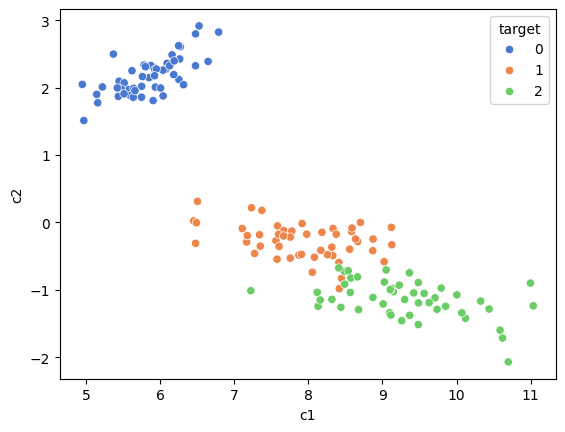

In [70]:
sns.scatterplot(
    x="c1",
    y="c2",
    hue='target',
    palette='muted',
    data=iris_svd_df
)

plt.show()